In [1]:
import scipy.io
import numpy as np
import pandas as pd
from pandas.io.parsers import read_csv
import dateutil
from dateutil.parser import parse
import pylab
from matplotlib import pyplot as plt
from IPython import get_ipython
import datetime
import matplotlib.dates
import math
from tqdm import tqdm_notebook
from scipy.signal import savgol_filter

%matplotlib inline
plt.style.use('dark_background')

In [2]:
master_df = pd.read_csv('../processed_data/master_dataset.csv')

In [4]:
master_df.CountryName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'United Arab Emirates',
       'Argentina', 'Australia', 'Austria', 'Belgium', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Botswana', 'Canada', 'Switzerland', 'Chile',
       'Cameroon', 'Colombia', 'Cape Verde', 'Costa Rica', 'Germany',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Spain',
       'Estonia', 'Finland', 'France', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Honduras',
       'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iraq',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan',
       'Kenya', 'South Korea', 'Kuwait', 'Laos', 'Lebanon', 'Libya',
       'Sri Lanka', 'Lithuania', 'Luxembourg', 'Moldova', 'Mexico',
       'Mali', 'Mongolia', 'Mozambique', 'Mauritius', 'Malaysia',
       'Namibia', 'Niger', 'Nigeria', 'Nicaragua

In [5]:
master_df.CountryCode.unique()

array(['ABW', 'AFG', 'AGO', 'ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BEN',
       'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA',
       'BRB', 'BWA', 'CAN', 'CHE', 'CHL', 'CMR', 'COL', 'CPV', 'CRI',
       'DEU', 'DNK', 'DOM', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA',
       'GAB', 'GBR', 'GEO', 'GHA', 'GRC', 'GTM', 'HKG', 'HND', 'HRV',
       'HUN', 'IDN', 'IND', 'IRL', 'IRQ', 'ISR', 'ITA', 'JAM', 'JOR',
       'JPN', 'KAZ', 'KEN', 'KOR', 'KWT', 'LAO', 'LBN', 'LBY', 'LKA',
       'LTU', 'LUX', 'MDA', 'MEX', 'MLI', 'MNG', 'MOZ', 'MUS', 'MYS',
       'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN',
       'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRI', 'PRT', 'PRY',
       'QAT', 'ROU', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVN',
       'SWE', 'THA', 'TTO', 'TUR', 'TZA', 'UGA', 'URY', 'USA', 'VEN',
       'VNM', 'YEM', 'ZAF', 'ZMB', 'ZWE', 'TWN'], dtype=object)

In [6]:
master_df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

In [7]:
def make_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    
    #work places
    dates = []
    u30work_vals = []
    gov_index_work = []
    cont_index_work = []
    econ_index_work = []
    strin_index_work = []
    cases = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['workplaces_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates.append(date)
        u30work_val = country_df['workplaces_percent_change_from_baseline'].loc[idx]
        u30work_vals.append(u30work_val)
        
        gov_index = country_df['GovernmentResponseIndex'].loc[idx]
        gov_index_work.append(gov_index)
        cont_index = country_df['ContainmentHealthIndex'].loc[idx]
        cont_index_work.append(cont_index)
        econ_index = country_df['EconomicSupportIndex'].loc[idx]
        econ_index_work.append(econ_index)
        strin_index = country_df['StringencyIndex'].loc[idx]
        strin_index_work.append(strin_index)
        cases_index = country_df['ConfirmedCases'].loc[idx]
        cases.append(cases_index)
    new_df['date_work_under_30'] = dates
    new_df['val_work_under_30'] = u30work_vals
    new_df['gov_index_work'] = gov_index_work
    new_df['cont_index_work'] = cont_index_work
    new_df['econ_index_work'] = econ_index_work
    new_df['strin_index_work'] = strin_index_work
    new_df['cases_work'] = cases
    
    #transit
    dates_tran= []
    u30tran_vals = []
    gov_index_tran = []
    cont_index_tran = []
    econ_index_tran = []
    strin_index_tran = []
    cases_tran = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['transit_stations_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates_tran.append(date)
        u30tran_val = country_df['transit_stations_percent_change_from_baseline'].loc[idx]
        u30tran_vals.append(u30tran_val)
        
        gov_index = country_df['GovernmentResponseIndex'].loc[idx]
        gov_index_tran.append(gov_index)
        cont_index = country_df['ContainmentHealthIndex'].loc[idx]
        cont_index_tran.append(cont_index)
        econ_index = country_df['EconomicSupportIndex'].loc[idx]
        econ_index_tran.append(econ_index)
        strin_index = country_df['StringencyIndex'].loc[idx]
        strin_index_tran.append(strin_index)
        cases_index = country_df['ConfirmedCases'].loc[idx]
        cases_tran.append(cases_index)
    new_df['date_tran_under_30'] = dates_tran
    new_df['val_tran_under_30'] = u30tran_vals
    new_df['gov_index_tran'] = gov_index_tran
    new_df['cont_index_tran'] = cont_index_tran
    new_df['econ_index_tran'] = econ_index_tran
    new_df['strin_index_tran'] = strin_index_tran
    new_df['cases_tran'] = cases_tran
    return new_df

In [8]:
new_df = make_df()
new_df

,CountryName,CountryCode,date_work_under_30,val_work_under_30,gov_index_work,cont_index_work,econ_index_work,strin_index_work,cases_work,date_tran_under_30,val_tran_under_30,gov_index_tran,cont_index_tran,econ_index_tran,strin_index_tran,cases_tran
0,Aruba,ABW,2020-02-24,-62.0,0.00,0.00,0.0,0.00,0.0,2020-03-18,-49.0,23.72,28.03,0.0,30.56,3.428571
1,Afghanistan,AFG,2020-03-21,-36.0,31.41,37.12,0.0,36.11,24.0,2020-03-28,-32.0,49.36,58.33,0.0,62.04,91.000000
2,Angola,AGO,2020-02-24,-63.0,3.85,4.55,0.0,5.56,0.0,2020-03-22,-41.0,10.26,12.12,0.0,11.11,2.000000
3,United Arab Emirates,ARE,2020-03-25,-35.0,66.67,69.70,50.0,70.37,248.0,2020-03-19,-31.0,41.67,49.24,0.0,45.37,113.000000
4,Argentina,ARG,2020-02-24,-54.0,7.69,9.09,0.0,11.11,0.0,2020-03-17,-32.0,35.26,41.67,0.0,41.67,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Yemen,YEM,2020-02-15,3.0,0.00,0.00,0.0,0.00,0.0,2020-02-15,4.0,0.00,0.00,0.0,0.00,0.000000
110,South Africa,ZAF,2020-03-26,-32.0,71.15,84.09,0.0,87.96,709.0,2020-03-22,-36.0,48.72,57.58,0.0,55.56,240.000000
111,Zambia,ZMB,2020-03-09,-44.0,11.54,13.64,0.0,16.67,0.0,2020-04-13,-32.0,49.36,53.79,25.0,50.93,43.000000
112,Zimbabwe,ZWE,2020-02-21,-58.0,5.77,6.82,0.0,8.33,0.0,2020-02-21,-33.0,5.77,6.82,0.0,8.33,0.000000


In [9]:
taiwan = master_df[master_df.CountryCode == 'ABW']
taiwan

,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.0
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.0
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.0
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.0
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.00,0.0,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,87,Aruba,ABW,2020-05-12,3.0,1.0,2.0,1.0,2.0,1.0,...,71.97,50.0,50.0,2020-05-12,-50.0,-21.0,-28.0,-53.0,-43.0,23.0
88,88,Aruba,ABW,2020-05-13,3.0,1.0,2.0,1.0,2.0,1.0,...,71.97,50.0,50.0,2020-05-13,-51.0,-22.0,-34.0,-54.0,-43.0,24.0
89,89,Aruba,ABW,2020-05-14,3.0,1.0,2.0,1.0,2.0,1.0,...,71.97,50.0,50.0,2020-05-14,-51.0,-22.0,-32.0,-54.0,-43.0,22.0
90,90,Aruba,ABW,2020-05-15,3.0,1.0,2.0,1.0,2.0,1.0,...,71.97,50.0,50.0,2020-05-15,-51.0,-16.0,-29.0,-55.0,-40.0,23.0


In [10]:
taiwan['transit_stations_percent_change_from_baseline'].describe()

count    92.000000
mean    -41.739130
std      33.570614
min     -92.000000
25%     -68.000000
50%     -55.000000
75%       0.000000
max      29.000000
Name: transit_stations_percent_change_from_baseline, dtype: float64

In [12]:
def make_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    
    #work places
    dates = []
    u30work_vals = []
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country]
        idx = (country_df['workplaces_percent_change_from_baseline'] >= -30).idxmin()
        date = country_df['Date'].loc[idx]
        dates.append(date)
        u30work_val = country_df['workplaces_percent_change_from_baseline'].loc[idx]
        u30work_vals.append(u30work_val)
    new_df['date_work_under_30'] = dates
    new_df['val_work_under_30'] = u30work_vals
    return new_df

In [13]:
df = make_df()
df

,CountryName,CountryCode,date_work_under_30,val_work_under_30
0,Aruba,ABW,2020-02-24,-62.0
1,Afghanistan,AFG,2020-03-21,-36.0
2,Angola,AGO,2020-02-24,-63.0
3,United Arab Emirates,ARE,2020-03-25,-35.0
4,Argentina,ARG,2020-02-24,-54.0
...,...,...,...,...
109,Yemen,YEM,2020-02-15,3.0
110,South Africa,ZAF,2020-03-26,-32.0
111,Zambia,ZMB,2020-03-09,-44.0
112,Zimbabwe,ZWE,2020-02-21,-58.0


In [14]:
usa = master_df[master_df.CountryCode == 'USA']
mob_sg = savgol_filter(usa['retail_and_recreation_percent_change_from_baseline'], 25, 3)
initial = usa['Unnamed: 0'].iloc[0]
usa['Day'] = usa['Unnamed: 0'].apply(lambda x: x - initial)
usa['smooth'] = mob_sg
usa['smooth'].min()
x = usa[usa['GovernmentResponseIndexForDisplay']!= 0]
x['GovernmentResponseIndexForDisplay'].mean()
"""
'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
"""

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


"\n'retail_and_recreation_percent_change_from_baseline',\n       'grocery_and_pharmacy_percent_change_from_baseline',\n       'parks_percent_change_from_baseline',\n       'transit_stations_percent_change_from_baseline',\n       'workplaces_percent_change_from_baseline',\n       'residential_percent_change_from_baseline'],\n"

In [58]:
from copy import copy

def smooth_df():
    new_df = pd.DataFrame()
    new_df['CountryName'] = master_df.CountryName.unique()
    new_df['CountryCode'] = master_df.CountryCode.unique()
    for country in new_df['CountryCode']:
        country_df = master_df[master_df.CountryCode == country].copy()
        master_df['smooth_workplaces_percent_change_from_baseline'] = 0
        minind = country_df['Unnamed: 0'].min()
        maxind = country_df['Unnamed: 0'].max()
        mob_sg = savgol_filter(country_df['workplaces_percent_change_from_baseline'], 25, 3)
        country_df['smooth_workplaces_percent_change_from_baseline'] = mob_sg.copy()
        print(minind)
        print(maxind,"--")


        #master_df['smooth_workplaces_percent_change_from_baseline'] = country_df['smooth_workplaces_percent_change_from_baseline']
        master_df['smooth_workplaces_percent_change_from_baseline'].iloc[minind:maxind] = country_df['smooth_workplaces_percent_change_from_baseline']
    return master_df
smooth_df()

0
91 --
92
183 --
184
275 --
276
367 --
368
459 --
460
551 --
552
643 --
644
735 --
736
827 --
828
919 --
920
1011 --
1012
1103 --
1104
1195 --
1196
1287 --
1288
1379 --
1380
1471 --
1472
1563 --
1564
1655 --
1656
1747 --
1748
1839 --
1840
1931 --
1932
2023 --
2024
2115 --
2116
2207 --


/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


2208
2299 --
2300
2391 --
2392
2483 --
2484
2575 --
2576
2667 --
2668
2759 --
2760
2851 --
2852
2943 --
2944
3035 --
3036
3127 --
3128
3219 --
3220
3311 --
3312
3403 --
3404
3495 --
3496
3587 --
3588
3679 --
3680
3771 --
3772
3863 --
3864
3955 --
3956
4047 --
4048
4139 --
4140
4231 --
4232
4323 --
4324
4415 --
4416
4507 --
4508
4599 --
4600
4691 --
4692
4783 --
4784
4875 --
4876
4967 --
4968
5059 --
5060
5151 --
5152
5243 --
5244
5335 --
5336
5427 --
5428
5519 --
5520
5611 --
5612
5703 --
5704
5795 --
5796
5887 --
5888
5979 --
5980
6071 --
6072
6163 --
6164
6255 --
6256
6347 --
6348
6439 --
6440
6531 --
6532
6623 --
6624
6715 --
6716
6807 --
6808
6899 --
6900
6991 --
6992
7083 --
7084
7175 --
7176
7267 --
7268
7359 --
7360
7451 --
7452
7543 --
7544
7635 --
7636
7727 --
7728
7819 --
7820
7911 --
7912
8003 --
8004
8095 --
8096
8187 --
8188
8279 --
8280
8371 --
8372
8463 --
8464
8555 --
8556
8647 --
8648
8739 --
8740
8831 --
8832
8923 --
8924
9015 --
9016
9107 --
9108
9199 --
9200
9291 --

,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,smooth_StringencyIndexForDisplay,smooth_GovernmentResponseIndexForDisplay,smooth_ContainmentHealthIndexForDisplay,smooth_EconomicSupportIndexForDisplay,smooth_retail_and_recreation_percent_change_from_baseline,smooth_grocery_and_pharmacy_percent_change_from_baseline,smooth_parks_percent_change_from_baseline,smooth_transit_stations_percent_change_from_baseline,smooth_workplaces_percent_change_from_baseline,smooth_residential_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,1,0,8,12,0.000000,0
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0,-1,8,10,0.000000,1
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0,-3,8,9,0.000000,2
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0,-4,8,7,0.000000,2
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0,0,0,0,0,-4,8,6,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,10483,Taiwan,TWN,2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN,...,27,33,37,12,-9,5,-8,-16,5.014293,1
10484,10484,Taiwan,TWN,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,...,27,33,37,12,-9,5,-8,-17,4.919259,1
10485,10485,Taiwan,TWN,2020-05-14,NaN,NaN,NaN,NaN,NaN,NaN,...,27,33,37,12,-9,4,-8,-17,4.525671,1
10486,10486,Taiwan,TWN,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,...,27,33,37,12,-9,3,-7,-18,3.791111,1


In [49]:
master_df=pd.read_csv('../processed_data/master_dataset.csv')

master_df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

In [50]:
cols = ['StringencyIndexForDisplay',
      'GovernmentResponseIndexForDisplay',
      'ContainmentHealthIndexForDisplay',
      'EconomicSupportIndexForDisplay',
      'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']
for col in cols: 
    master_df['smooth_'+col] = 0
    for cc in master_df['CountryCode'].unique():
        ts_data = np.array(master_df[col][master_df['CountryCode'] == cc])
        #print(ts_data)

        mob_sg = savgol_filter(ts_data, 25, 3)

        #master_df['smooth_workplaces_percent_change_from_baseline'] = country_df['smooth_workplaces_percent_change_from_baseline']
        master_df['smooth_'+col][master_df['CountryCode'] == cc] = mob_sg


/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


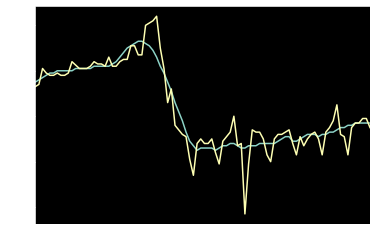

In [59]:
master_df['smooth_grocery_and_pharmacy_percent_change_from_baseline'][master_df['CountryName'] == 'United Kingdom'].plot()
master_df['grocery_and_pharmacy_percent_change_from_baseline'][master_df['CountryName'] == 'United Kingdom'].plot()

In [56]:
master_df.to_csv('../processed_data/master_dataset_smooth.csv', index = None)

In [20]:
master_df['smooth'] = 0
master_df['smooth'].iloc[9752:9843] = usa['smooth']

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
hi = smooth_df()
hi

/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/thomastran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Unnamed: 0,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,...,EconomicSupportIndexForDisplay,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,smooth,smooth_workplaces_percent_change_from_baseline
0,0,Aruba,ABW,2020-02-15,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-15,2.0,3.0,12.0,26.0,-2.0,-2.0,0.0,0.000000
1,1,Aruba,ABW,2020-02-16,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-16,-1.0,-9.0,4.0,1.0,-1.0,2.0,0.0,0.000000
2,2,Aruba,ABW,2020-02-17,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-17,-1.0,-1.0,16.0,-4.0,-20.0,6.0,0.0,0.000000
3,3,Aruba,ABW,2020-02-18,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-18,-2.0,-5.0,8.0,2.0,-13.0,4.0,0.0,0.000000
4,4,Aruba,ABW,2020-02-19,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,2020-02-19,1.0,-8.0,3.0,4.0,-14.0,4.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,10483,Taiwan,TWN,2020-05-12,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-12,-15.0,3.0,-14.0,-19.0,8.0,3.0,0.0,5.014293
10484,10484,Taiwan,TWN,2020-05-13,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-13,-11.0,4.0,1.0,-15.0,9.0,2.0,0.0,4.919259
10485,10485,Taiwan,TWN,2020-05-14,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-14,-10.0,5.0,-9.0,-18.0,7.0,-2.0,0.0,4.525671
10486,10486,Taiwan,TWN,2020-05-15,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,2020-05-15,-5.0,6.0,0.0,-11.0,2.0,1.0,0.0,3.791111


In [22]:
hi.plot('Unnammed: 0', 'smooth_workplaces_percent_change_from_baseline')

KeyError: 'Unnammed: 0'